# IMPORTING LIBRARIES

In [1]:
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns

# FILES READ

In [2]:
project_path = os.getcwd()
data_folder = 'data'
data_path = os.path.join(project_path,data_folder)
file_list = os.listdir(os.path.join(project_path,data_folder))
file_list
games_csv = f'{data_path}\\{file_list[0]}'

# LOADING & SETTING DATAFRAME

In [3]:
game_df = pd.read_csv(games_csv)
game_df.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,Action,FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,Action,Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,Action,FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [4]:
print(f'Number of [rows] => {game_df.shape[0]} and number of [columns] => {game_df.shape[1]} in game_df')

Number of [rows] => 27075 and number of [columns] => 18 in game_df


In [5]:
game_df.isnull().sum() / game_df.shape[0] * 100

appid               0.0
name                0.0
release_date        0.0
english             0.0
developer           0.0
publisher           0.0
platforms           0.0
required_age        0.0
categories          0.0
genres              0.0
steamspy_tags       0.0
achievements        0.0
positive_ratings    0.0
negative_ratings    0.0
average_playtime    0.0
median_playtime     0.0
owners              0.0
price               0.0
dtype: float64

In [6]:
game_df['genres'] = game_df.genres.apply(lambda x: x.split(';'))

In [7]:
game_df.head(5)

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,[Action],FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,[Action],FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99


In [8]:
game_df['genres'].apply(lambda x: len(x))

0        1
1        1
2        1
3        1
4        1
        ..
27070    3
27071    3
27072    3
27073    3
27074    3
Name: genres, Length: 27075, dtype: int64

In [9]:
#genre_val_counts = {}
def comparision(df,column):
    genre_val_counts = {"key":[],"counts":[]}
    bow = pd.get_dummies(df[column].apply(pd.Series).stack()).sum(level=0)
    for i in bow.keys().tolist():
        #print(f'{i}')
        #print(f'{a[i].value_counts()}')
        counts = bow[i].value_counts()
        sorted_ind = counts.sort_index()
        #print(sorted_ind[1])
        genre_val_counts["key"].append(i)
        genre_val_counts["counts"].append(sorted_ind[1])
        #print('------------------------------')
    return genre_val_counts

In [10]:
all_genres = comparision(game_df,'genres')

Accounting
6
------------------------------
Action
11903
------------------------------
Adventure
10032
------------------------------
Animation & Modeling
79
------------------------------
Audio Production
29
------------------------------
Casual
10210
------------------------------
Design & Illustration
87
------------------------------
Documentary
1
------------------------------
Early Access
2954
------------------------------
Education
51
------------------------------
Free to Play
1704
------------------------------
Game Development
17
------------------------------
Gore
537
------------------------------
Indie
19421
------------------------------
Massively Multiplayer
723
------------------------------
Nudity
266
------------------------------
Photo Editing
12
------------------------------
RPG
4311
------------------------------
Racing
1024
------------------------------
Sexual Content
245
------------------------------
Simulation
5194
------------------------------
Software Tr

C:\Users\user\AppData\Local\Temp\ipykernel_8796\4100458392.py:4: FutureWarning: Using the level keyword in DataFrame and Series aggregations is deprecated and will be removed in a future version. Use groupby instead. df.sum(level=1) should use df.groupby(level=1).sum().
  bow = pd.get_dummies(df[column].apply(pd.Series).stack()).sum(level=0)


In [11]:
genre_df = pd.DataFrame(data=all_genres)
top_genres = genre_df.sort_values(by="counts",ascending=False)
bottom_genres = genre_df.sort_values(by="counts",ascending=True)

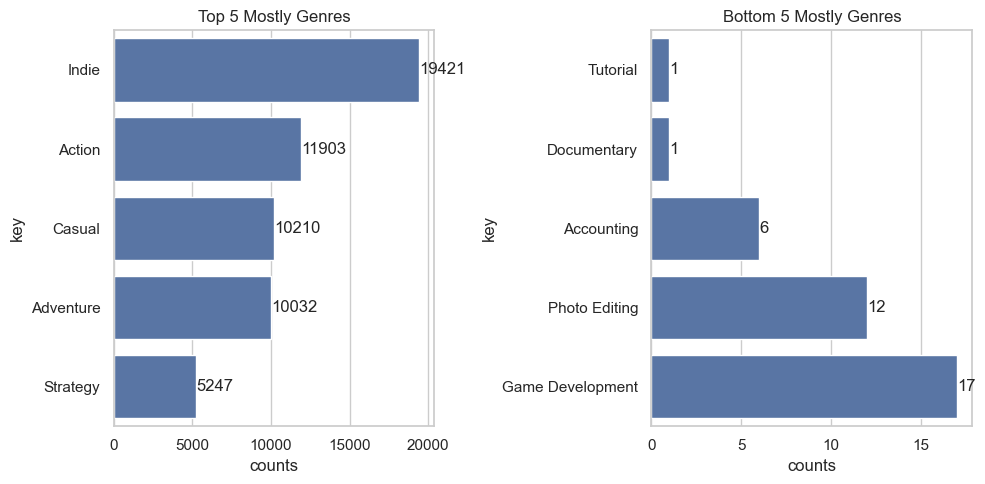

In [12]:
sns.set_theme(style="whitegrid");
fig, axes = plt.subplots(1,2,figsize=(10, 5));
axes[0].set_title('Top 5 Mostly Genres');
axes[1].set_title('Bottom 5 Mostly Genres');
top_chart = sns.barplot(x=top_genres['counts'][0:5],y=top_genres['key'][0:5],color="b",ax=axes[0]);
for i in top_chart.containers:
    top_chart.bar_label(i,)
bottom_chart = sns.barplot(x=bottom_genres['counts'][0:5],y=bottom_genres['key'][0:5],color="b",ax=axes[1]);
for i in bottom_chart.containers:
    bottom_chart.bar_label(i,)
fig.tight_layout();
plt.savefig('top-and-bottom-genres.png')

# FREE GAMES LIST

In [13]:
free_games = game_df[(game_df['price'] == 0)].sort_values(by="name",ascending=False).reset_index().drop(['index','appid'],axis=1)
free_games.head(5)

,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,신기록 : A Compendium of Ghosts,2018-06-05,0,Team 33,Team 33,windows,0,Single-player,"[Adventure, Casual, Free to Play, Indie, RPG]",Adventure;Free to Play;RPG,0,29,2,0,0,0-20000,0.0
1,阿达三国志2019 竖版 Three Kingdoms 2019,2018-11-29,0,阿达游戏,阿达游戏,windows,0,Single-player;Multi-player;Online Multi-Player...,"[Action, Adventure, Casual, Free to Play, Mass...",Free to Play;Strategy;Action,0,11,9,0,0,0-20000,0.0
2,阿津,2019-03-30,0,阿津,歐津津教團,windows,0,Single-player,"[Adventure, Free to Play, RPG]",Free to Play;Adventure;RPG,0,46,0,0,0,0-20000,0.0
3,英语杀,2018-11-04,0,边玩边学网络科技有限公司,边玩边学网络科技有限公司,windows,0,Single-player,"[Casual, Free to Play, Indie, RPG, Strategy, A...",Strategy;Indie;Free to Play,1,4,7,0,0,0-20000,0.0
4,老虎游戏,2018-11-20,0,上海信虎文化传播有限公司,上海信虎文化传播有限公司,windows,0,Single-player;Multi-player;Online Multi-Player,"[Casual, Free to Play, Indie, RPG, Simulation,...",Free to Play;Strategy;Indie,0,2,10,0,0,0-20000,0.0


In [14]:
game_df.iloc[game_df['positive_ratings'].idxmax()]['name']

'Counter-Strike: Global Offensive'

In [15]:
game_df.iloc[game_df['positive_ratings'].idxmin()]['name']

'Raycatcher'

In [16]:
rank_table = pd.DataFrame(game_df['positive_ratings'].rank(method='first').sort_values())
rank_table

,positive_ratings
577,1.0
683,2.0
4503,3.0
4742,4.0
4757,5.0
...,...
121,27071.0
12836,27072.0
19,27073.0
22,27074.0


In [17]:
rank_table['loc'] = rank_table.index
rank_table

,positive_ratings,loc
577,1.0,577
683,2.0,683
4503,3.0,4503
4742,4.0,4742
4757,5.0,4757
...,...,...
121,27071.0,121
12836,27072.0,12836
19,27073.0,19
22,27074.0,22


In [31]:
game_df

,appid,name,release_date,english,developer,publisher,platforms,required_age,categories,genres,steamspy_tags,achievements,positive_ratings,negative_ratings,average_playtime,median_playtime,owners,price
0,10,Counter-Strike,2000-11-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],Action;FPS;Multiplayer,0,124534,3339,17612,317,10000000-20000000,7.19
1,20,Team Fortress Classic,1999-04-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],Action;FPS;Multiplayer,0,3318,633,277,62,5000000-10000000,3.99
2,30,Day of Defeat,2003-05-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Valve Anti-Cheat enabled,[Action],FPS;World War II;Multiplayer,0,3416,398,187,34,5000000-10000000,3.99
3,40,Deathmatch Classic,2001-06-01,1,Valve,Valve,windows;mac;linux,0,Multi-player;Online Multi-Player;Local Multi-P...,[Action],Action;FPS;Multiplayer,0,1273,267,258,184,5000000-10000000,3.99
4,50,Half-Life: Opposing Force,1999-11-01,1,Gearbox Software,Valve,windows;mac;linux,0,Single-player;Multi-player;Valve Anti-Cheat en...,[Action],FPS;Action;Sci-fi,0,5250,288,624,415,5000000-10000000,3.99
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27070,1065230,Room of Pandora,2019-04-24,1,SHEN JIAWEI,SHEN JIAWEI,windows,0,Single-player;Steam Achievements,"[Adventure, Casual, Indie]",Adventure;Indie;Casual,7,3,0,0,0,0-20000,2.09
27071,1065570,Cyber Gun,2019-04-23,1,Semyon Maximov,BekkerDev Studio,windows,0,Single-player,"[Action, Adventure, Indie]",Action;Indie;Adventure,0,8,1,0,0,0-20000,1.69
27072,1065650,Super Star Blast,2019-04-24,1,EntwicklerX,EntwicklerX,windows,0,Single-player;Multi-player;Co-op;Shared/Split ...,"[Action, Casual, Indie]",Action;Indie;Casual,24,0,1,0,0,0-20000,3.99
27073,1066700,New Yankee 7: Deer Hunters,2019-04-17,1,Yustas Game Studio,Alawar Entertainment,windows;mac,0,Single-player;Steam Cloud,"[Adventure, Casual, Indie]",Indie;Casual;Adventure,0,2,0,0,0,0-20000,5.19
